In [1]:
#!pip install pydot

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,AveragePooling2D,MaxPooling2D,Dense,Flatten


In [2]:
input_shape = (256,256,3)

In [3]:
def build_model():
    model = Sequential([
    Conv2D(32,kernel_size=(3,3),activation = 'relu', padding = 'same',input_shape = input_shape),
    Conv2D(32,kernel_size=(3,3),activation = 'relu', padding = 'same'),
    MaxPooling2D(pool_size = (2,2)),
   
    
    Conv2D(64,kernel_size=(3,3),activation = 'relu', padding = 'same'),
    Conv2D(64,kernel_size=(3,3),activation = 'relu', padding = 'same'),
    MaxPooling2D(pool_size = (2,2)),

    Flatten(),
    Dense(128,activation = 'relu'),

    Dense(3,activation = 'softmax')   
    ])
    return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                    

C:\Users\tharh\.conda\envs\ths\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


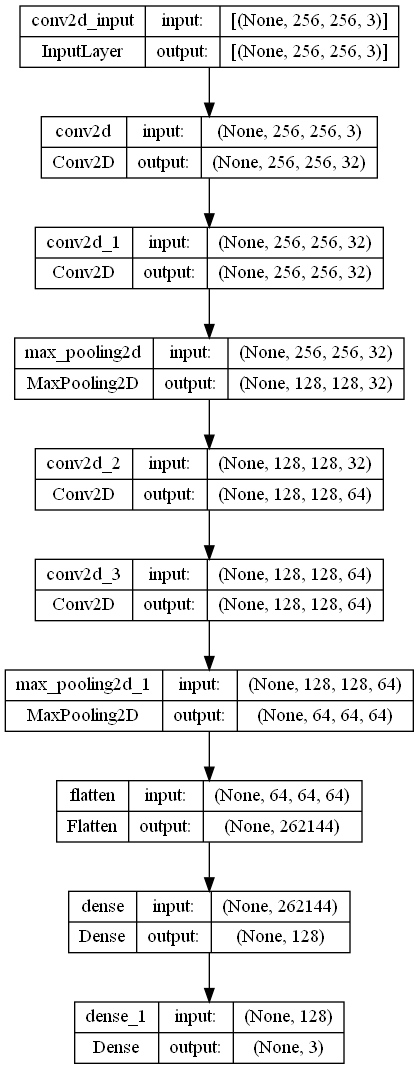

In [4]:
model = build_model()
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',metrics=["accuracy"])

model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

In [5]:
import os
train_path = os.getcwd()+"\\dataset\\train"
validation_path = os.getcwd()+"\\dataset\\val"

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_path,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(256, 256))     

validation_generator =  test_datagen.flow_from_directory(validation_path,
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size=(256, 256))

Found 540 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [7]:
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=20,
                              epochs=5,
                              validation_steps=20,
                              verbose=1)

C:\Users\tharh\AppData\Local\Temp\ipykernel_21096\3069777534.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/5
20/20 [==============================] - 6s 160ms/step - loss: 8.4779 - accuracy: 0.4150 - val_loss: 0.7000 - val_accuracy: 0.6333
Epoch 2/5
20/20 [==============================] - 2s 97ms/step - loss: 0.7655 - accuracy: 0.6625
Epoch 3/5
20/20 [==============================] - 2s 110ms/step - loss: 0.9860 - accuracy: 0.7125
Epoch 4/5
20/20 [==============================] - 2s 108ms/step - loss: 0.6017 - accuracy: 0.8000
Epoch 5/5
20/20 [==============================] - 2s 101ms/step - loss: 0.6066 - accuracy: 0.8400


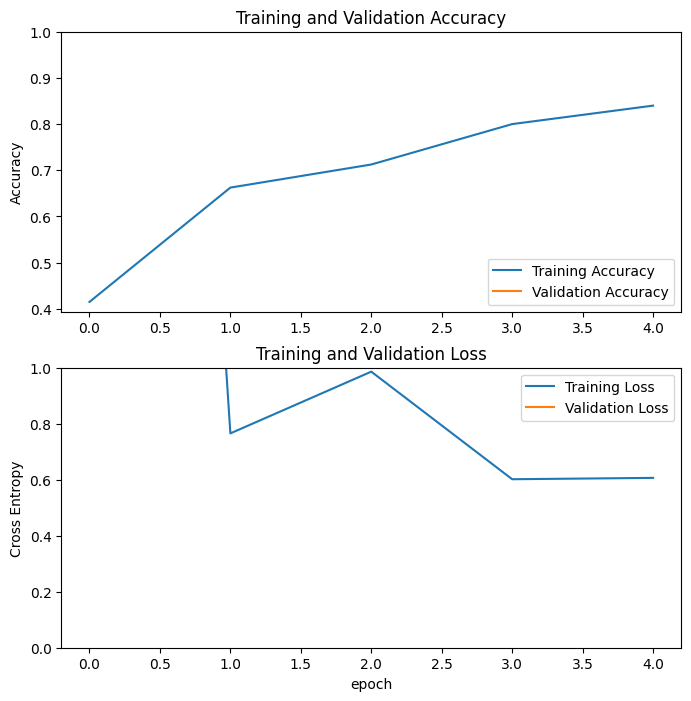

In [8]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [35]:
import numpy as np
class_label = ['car','hourse','person']
true_labels = []
predicted_labels = []

In [40]:
import matplotlib.pyplot as plt

count = 0
for image,label in validation_generator:
    
    
    
    predicted_temp = model.predict(image)
    for i in range(len(label)):
        true_labels.append(class_label[np.argmax(label[i])])
        predicted_labels.append(class_label[np.argmax(predicted_temp[i])])
        

    count = count+1
    if count > 10:
        break
    
test_accuracy = 100 * np.sum(np.array(predicted_labels)==true_labels) / len(predicted_labels)
print("Test accuracy : {}".format(test_accuracy))

1/1 [==============================] - 0s 24ms/step
Test accuracy : 68.57142857142857


In [41]:
model.save("hourse_car_person.h5")